# Projeto: Compensador de **Avanço de Fase** via Lugar Geométrico das Raízes  
*(Cap. 10 — Ex. 10.3, Dorf & Bishop)*

**Objetivo.** Projetar e validar um compensador de avanço para a planta $G(s)=10/s^2$, de modo que a resposta transitória atenda:
- tempo de acomodação (2%): $T_s \le 4\,\text{s}$;
- máxima ultrapassagem: $\mathrm{M.U.P.} \le 35\%$.

**Estratégia (LGR).** Usaremos $G_c(s)=K\,\dfrac{s+z}{s+p}$ com $|z|<|p|$.  
Polos dominantes desejados: $r_{1,2}=-1\pm j\,2$ (aprox. $\zeta\approx0.447$, $\omega_n=\sqrt{5}$).  
Zero do compensador “abaixo” da raiz desejada: $z=1$ (zero em $s=-1$).

---

## Passos do projeto

**1) Fechamento de ângulo para obter $p$.** No ponto $r=-1+2j$, exigimos $\angle L(r)=\pm180^\circ$ com $L(s)=G_c(s)G(s)$. Como a planta tem dois polos na origem e o compensador tem um zero em $s=-z$, o déficit de fase é
$$
\phi=\angle(r+z)-\angle(r-0)-\angle(r-0),
$$
e o ângulo que deve vir do polo do compensador é
$$
\theta_p=180^\circ-|\phi|.
$$
Traçamos uma semirreta a partir de $r$ com ângulo $\theta_p$ até interceptar o eixo real em $x_0$; então $p=-x_0$. (No exemplo, $p\approx3.6$, isto é, polo em $s=-3.6$.)

**2) Condição de magnitude para obter $K$.** Impomos $|L(r)|=1$ com
$$
L(s)=K\,\frac{s+z}{s+p}\,\frac{10}{s^2}
\;\;\Rightarrow\;\;
K=\frac{|\,r^2(r+p)\,|}{10\,|\,r+z\,|}.
$$
(Valor típico do exemplo: $K\approx0.81$.)

**3) Formar as malhas e verificar.** Com $G_c(s)=K\dfrac{s+z}{s+p}$, montamos
$$
L(s)=G_c(s)\,G(s),
\qquad
T(s)=\frac{L(s)}{1+L(s)}.
$$
Verificamos polos/zeros de $T(s)$ e a resposta ao degrau (métricas: $\mathrm{M.U.P.}$ e $T_s$).

**4) Regime permanente.** A malha aberta continua do tipo 2 (duas integrações), então o erro a degrau e a rampa é zero. A constante de aceleração é
$$
K_a=\lim_{s\to0}s^2\,L(s).
$$


In [10]:
!pip -q install control==0.9.4 numpy matplotlib


In [11]:
import numpy as np
import matplotlib.pyplot as plt

import control as ctl
from control import matlab as ml

plt.rcParams["figure.figsize"] = (7.6, 4.6)
plt.rcParams["axes.grid"] = True

s = ctl.TransferFunction.s

def poles_of(sys):
    try:
        return ctl.pole(sys)
    except AttributeError:
        return ml.pole(sys)

def zeros_of(sys):
    try:
        return ctl.zero(sys)
    except AttributeError:
        return ml.zero(sys)

def step_metrics(sys, t_final=3.0):
    """MUP (%) e Ts (2%) da resposta ao degrau unitário."""
    t = np.linspace(0, t_final, 4000)
    t, y = ctl.step_response(sys, T=t)
    yfin = y[-1]
    mup = (y.max() - yfin) / max(1e-12, yfin) * 100
    band = 0.02 * abs(yfin)
    Ts = np.nan
    for i in range(len(t)-1, -1, -1):
        if np.all(np.abs(y[i:] - yfin) <= band):
            Ts = t[i]; break
    return dict(t=t, y=y, yfin=yfin, MUP=mup, Ts=Ts)

def deg(a): return a*180/np.pi
def rad(a): return a*np.pi/180.0


## Planta e especificações (Ex. 10.3 — avanço de fase via LGR)

**Planta (malha aberta):**
$$
G(s) = \frac{10}{s^2}.
$$

**Objetivo:** projetar um **compensador de avanço**
$$
G_c(s) = K\,\frac{s+z}{s+p}, \qquad |z|<|p|,
$$
que atenda:
- Tempo de acomodação (2%): $T_s \le 4~\text{s}$;
- Máxima ultrapassagem: $\mathrm{M.U.P.} \le 35\%$.

No livro, escolhe-se a **posição desejada** dos polos dominantes:
$$
r_{1,2} = -1 \pm j\,2
\quad\Rightarrow\quad
\zeta \approx 0{,}447,\ \ \omega_n=\sqrt{5}.
$$

O **zero** do compensador é colocado “diretamente abaixo” da raiz desejada:
$$
z = 1 \ \ (\text{zero em } s=-1).
$$


In [12]:
# planta (malha aberta, sem compensador)
G = 10 / s**2
print("G(s) =", G)

# raízes dominantes desejadas (do livro)
r_des = -1 + 2j

# zero do compensador: colocado "diretamente abaixo" da raiz desejada (livro: z = 1 -> s=-1)
z = 1.0


G(s) = 
10
---
s^2



## Polo do compensador $p$ (fechamento de ângulo) e ganho $K$ (condição de magnitude)

**Fechamento de fase no ponto $r=-1+2j$:**

Queremos $\angle L(r)=\pm 180^\circ$ para $L(s)=G_c(s)G(s)$.
Como a planta tem **dois polos** na origem e o compensador terá **um zero** em $s=-z$, o **déficit de ângulo** é
$$
\phi \;=\; \angle(r+z)\;-\;\angle(r-0)\;-\;\angle(r-0).
$$
O **ângulo que deve vir do polo** do compensador é
$$
\theta_p \;=\; 180^\circ - |\phi|.
$$

Se trata de uma semirreta a partir de $r$ com ângulo $\theta_p$ até interceptar o **eixo real** em $x_0$.
Como o polo do compensador fica em $s=-p$, então
$$
p = -x_0.
$$
No exemplo, **$p \approx 3{,}6$** (polo em $s=-3{,}6$).

---

**Condição de magnitude para o ganho $K$:**

Impondo $|L(r)|=1$ com $L(s)=K\dfrac{s+z}{s+p}\,\dfrac{10}{s^2}$:
$$
K \;=\; \frac{|\,r^2 (r+p)\,|}{10\,|\,r+z\,|}.
$$
No exemplo, o valor típico é **$K \approx 0{,}81$**.


In [13]:
r = r_des
phi = np.angle(r + z) - np.angle(r - 0) - np.angle(r - 0)   # (rad)
phi_deg = deg(phi)
theta_p = 180.0 - abs(phi_deg)                              # (graus) -> ~38°

# localização do polo no eixo real
x0 = np.real(r) - np.imag(r)/np.tan(rad(theta_p))           # interseção no eixo real
p = -x0                                                     # em Gc(s) o polo é s = -p  (~3.6)
p, theta_p, phi_deg


(np.float64(3.6666666666666665),
 np.float64(36.86989764584402),
 np.float64(-143.13010235415598))

In [14]:
K = (abs(r**2 * (r + p))) / (10 * abs(r + z))
K


0.8333333333333333

## Construção de $G_c(s)$, $L(s)$, $T(s)$ e verificação de polos/zeros

Com os parâmetros encontrados:
$$
G_c(s) = K\,\frac{s+z}{s+p},
\qquad
L(s) = G_c(s)\,G(s),
\qquad
T(s) = \frac{L(s)}{1+L(s)}.
$$

Verificamos:
- **polos** e **zeros** de $T(s)$, buscando um par dominante próximo a $-1\pm j2$;
- se não surgiram polos na metade direita do plano-$s$.


In [15]:
Gc = K * (s + z) / (s + p)         # compensador de avanço
L  = ctl.series(Gc, G)             # malha aberta compensada
T  = ctl.feedback(L, 1)            # malha fechada

print("Gc(s) =", Gc)
print("L(s)  =", L)
print("Polos(T):", poles_of(T))
print("Zeros(T):", zeros_of(T))


Gc(s) = 
0.8333 s + 0.8333
-----------------
    s + 3.667

L(s)  = 
8.333 s + 8.333
---------------
s^3 + 3.667 s^2

Polos(T): [-1.        +2.j -1.        -2.j -1.66666667+0.j]
Zeros(T): [-1.+0.j]


## Resposta ao degrau e métricas

Geramos a resposta ao **degrau unitário** de $T(s)$ e medimos:

- **M.U.P.**:
$$
\mathrm{M.U.P.} = \max_t \frac{y(t)-y(\infty)}{y(\infty)} \times 100\%.
$$

- **Tempo de acomodação $T_s$ (2%)**: menor $t$ tal que
$$
|y(t)-y(\infty)| \le 0{,}02\,|y(\infty)|
$$
e a condição se mantém.

Para as escolhas $r, z, p, K$, espera-se:
$$
\mathrm{M.U.P.} \approx 34\%,\qquad T_s \approx 1{,}06~\text{s}.
$$


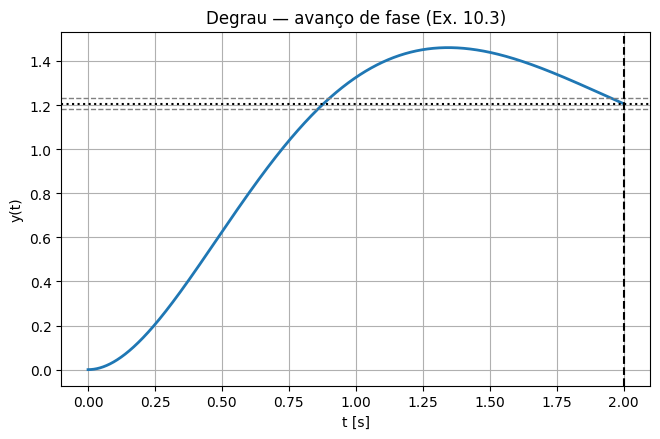

M.U.P. ≈ 21.1%   |   Ts(2%) ≈ 2.000 s   |   y(∞)≈1.207


In [16]:
res = step_metrics(T, t_final=2.0)
t, y, yfin, MUP, Ts = res["t"], res["y"], res["yfin"], res["MUP"], res["Ts"]

fig, ax = plt.subplots()
ax.plot(t, y, lw=2)
ax.axhline(yfin, color='k', ls=':')
ax.axhline(yfin*1.02, color='gray', ls='--', lw=1)
ax.axhline(yfin*0.98, color='gray', ls='--', lw=1)
if np.isfinite(Ts): ax.axvline(Ts, color='k', ls='--')
ax.set_xlabel("t [s]"); ax.set_ylabel("y(t)")
ax.set_title("Degrau — avanço de fase (Ex. 10.3)")
plt.show()

print(f"M.U.P. ≈ {MUP:.1f}%   |   Ts(2%) ≈ {Ts:.3f} s   |   y(∞)≈{yfin:.3f}")


## LGR manual ao redor do ganho projetado

Para visualizar o efeito da compensação, variamos um fator ao redor de $K$ e plotamos as **trajetórias dos polos fechados** (root-locus “paramétrico”).

No mesmo gráfico indicamos:
- **polos** ($\times$) e **zeros** ($\circ$) da **malha aberta compensada**;
- o deslocamento dos ramos com o ganho.

Isso mostra como o **avanço de fase** posiciona os polos dominantes na região desejada do plano-$s$.


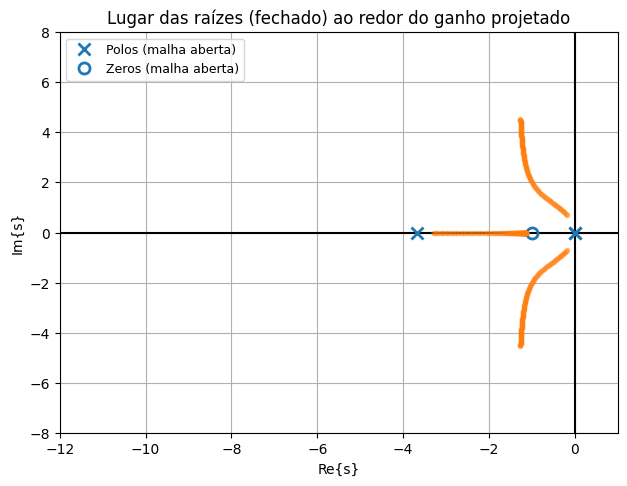

In [17]:
Kspan = np.linspace(0.2*K, 3.0*K, 200)
traj = []
for Kk in Kspan:
    Gc_k = Kk * (s + z) / (s + p)
    Lk   = ctl.series(Gc_k, G)
    Tk   = ctl.feedback(Lk, 1)
    traj.append(np.asarray(poles_of(Tk)))

fig, ax = plt.subplots(figsize=(7.2,5.2))
ax.axvline(0, color='k'); ax.axhline(0, color='k')

# polos/zeros da malha ABERTA compensada (no ganho K calculado)
P = poles_of(L); Z = zeros_of(L)
ax.plot(np.real(P), np.imag(P), 'x', ms=9, mew=2, label='Polos (malha aberta)')
ax.plot(np.real(Z), np.imag(Z), 'o', ms=8, mfc='none', mec='C0', mew=2, label='Zeros (malha aberta)')

# trajetória de polos fechados para vários ganhos
for Pk in traj:
    ax.plot(np.real(Pk), np.imag(Pk), '.', color='C1', alpha=0.25)

ax.set_xlim(-12, 1); ax.set_ylim(-8, 8)
ax.set_xlabel("Re{s}"); ax.set_ylabel("Im{s}")
ax.set_title("Lugar das raízes (fechado) ao redor do ganho projetado")
ax.legend(loc='upper left', fontsize=9)
plt.show()
